In [1]:
import pandas as pd


In [2]:
df=pd.read_csv('../data/amazon_data.csv')

In [3]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Initialize tools
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess(text):
    text = text.lower()
    text = re.sub(r'\W+', ' ', text)  # Remove special characters
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['processed_text'] = df['Product Name'].apply(preprocess)

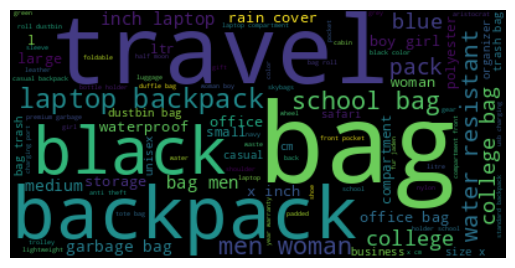

<Axes: xlabel='Samples', ylabel='Counts'>

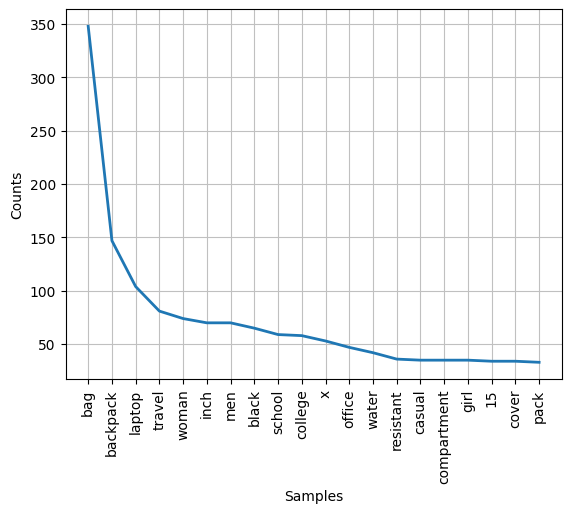

In [4]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk import FreqDist

# Generate word cloud
wordcloud = WordCloud().generate(' '.join(df['processed_text']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Analyze word frequency
all_words = ' '.join(df['processed_text']).split()
freq_dist = FreqDist(all_words)
freq_dist.plot(20) 